In [3]:
# Importing libraries

# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
# import seaborn as sns
 
# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Features - http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
            'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
            'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'intrusion_type']

## Accessing Data from blob storage

In [5]:
from azureml.core import Workspace, Dataset

('https://predintrution6570789805.blob.core.windows.net/azureml-blobstore-c303e6d3-3f31-4f5d-b997-ee6f080e3e86/<BLOB_NAME>')

subscription_id = 'ea31d986-323f-42ba-bc31-aef14ad815cc'
resource_group = 'Intrution_Detection_ML'
workspace_name = 'pred_intrution'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='kddcup_data_10_percent_corrected')
df = dataset.to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


In [6]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
## Renaming the column names


# Check if the number of features matches the number of columns in the DataFrame
if len(features) == len(df.columns):
    # Assign new column names to the DataFrame
    df.columns = features
    print("Column names successfully updated!")
else:
    print(f"Mismatch: DataFrame has {len(df.columns)} columns, but there are {len(features)} feature names.")
    
# Display the first few rows to confirm
df.head()


Column names successfully updated!


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
print('Number of data points: ',df.shape[0])
print('Number of features: ', df.shape[1])

Number of data points:  494021
Number of features:  42


In [9]:
output_labels = df['intrusion_type'].unique()
print(f"There are {len(output_labels)} output labels and are: {output_labels}")

There are 23 output labels and are: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


## Data cleaning

In [10]:
# Checking for null values
for index, value in df.isnull().sum().items():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

In [11]:
# There are no null values
# Checking for duplicate rows
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 348435


In [12]:
# Removing duplicate rows
df.drop_duplicates(keep='first', inplace=True)
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 0


In [13]:
# Saving the cleaned dataset
df.to_pickle('clean_dataset.pkl')

In [14]:
df = pd.read_pickle('clean_dataset.pkl')
df.shape

(145586, 42)

## Exploratory Data Analysis

In [15]:
# Distribution of classes in target label
dist = df['intrusion_type'].value_counts()

# Using items() to iterate through the distribution
for name, count in dist.items():
    print(f"Number of data points in class: {name.center(17)} is", end=' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")


Number of data points in class:      normal.      is 87832 (60.33%)
Number of data points in class:      neptune.     is 51820 (35.594%)
Number of data points in class:       back.       is 968 (0.665%)
Number of data points in class:     teardrop.     is 918 (0.631%)
Number of data points in class:       satan.      is 906 (0.622%)
Number of data points in class:    warezclient.   is 893 (0.613%)
Number of data points in class:      ipsweep.     is 651 (0.447%)
Number of data points in class:       smurf.      is 641 (0.44%)
Number of data points in class:     portsweep.    is 416 (0.286%)
Number of data points in class:        pod.       is 206 (0.141%)
Number of data points in class:       nmap.       is 158 (0.109%)
Number of data points in class:   guess_passwd.   is 53 (0.036%)
Number of data points in class:  buffer_overflow. is 30 (0.021%)
Number of data points in class:    warezmaster.   is 20 (0.014%)
Number of data points in class:       land.       is 19 (0.013%)
Number of 

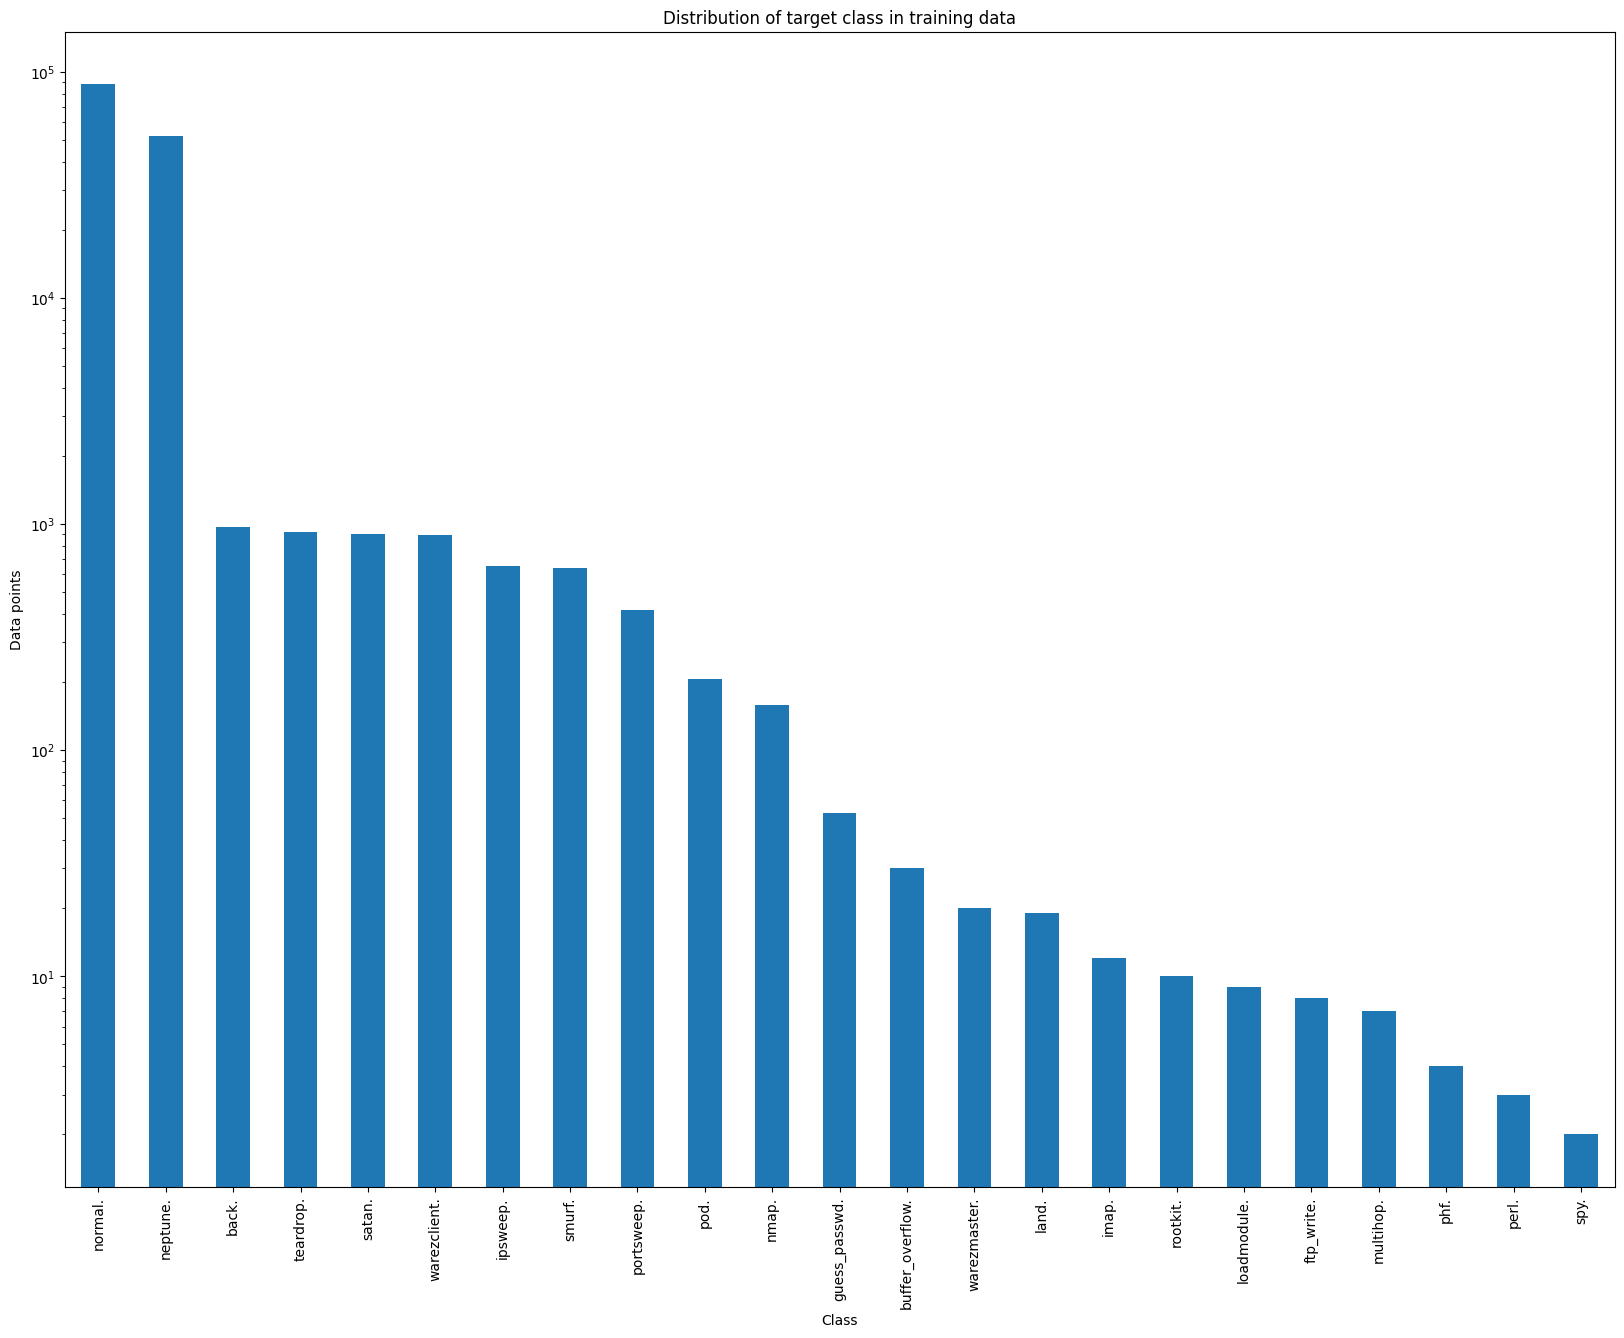

In [16]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

### Data Insights

- **Most of the data points** are from the "normal" (good connections) category, which accounts for **60.33%** of the dataset.
  
- Within the **bad connections** categories, the largest categories are:
  - "neptune." with **35.594%** of the data points.
  - "back." with **0.665%** of the data points.

- **Classes with very few data points** (less than 10 data points per class) include:
  - "rootkit."
  - "loadmodule."
  - "ftp_write."
  - "multihop."
  - "phf."
  - "perl."
  - "spy."

### Dataset Imbalance

- The dataset is **highly imbalanced**, with the majority of data points belonging to the "normal" category.
  
- **Challenges:**
  - We need to build a model that can accurately classify data points from the **low-distribution classes**, even though they have very few examples in the dataset.
  - As the dataset is imbalanced, special attention must be given to the **intrusion categories** to avoid bias towards the "normal" category.


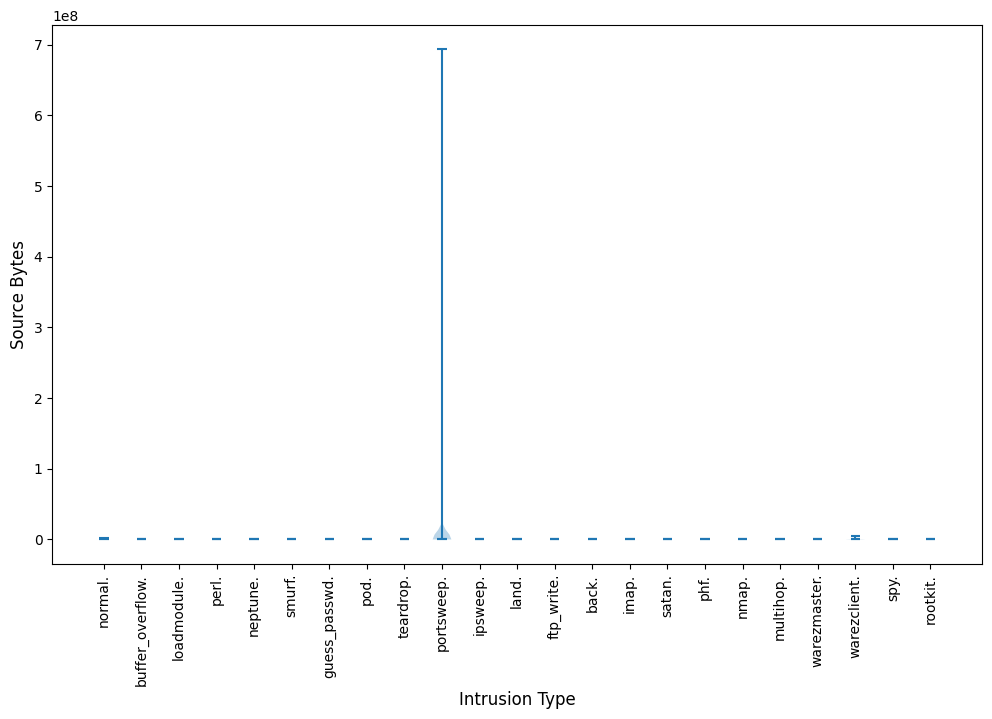

In [17]:
# Uni-variate analysis

# Set figure size
plt.figure(figsize=(12, 7))

# Extract unique categories of 'intrusion_type'
categories = df['intrusion_type'].unique()

# Prepare data for plotting
data = [df[df['intrusion_type'] == category]['src_bytes'] for category in categories]

# Create the violin plot
plt.violinplot(data, showmeans=False, showmedians=True)

# Set x-axis ticks and labels
plt.xticks(ticks=np.arange(1, len(categories) + 1), labels=categories, rotation=90)

# Set labels for axes
plt.xlabel('Intrusion Type', fontsize=12)
plt.ylabel('Source Bytes', fontsize=12)

# Show plot
plt.show()

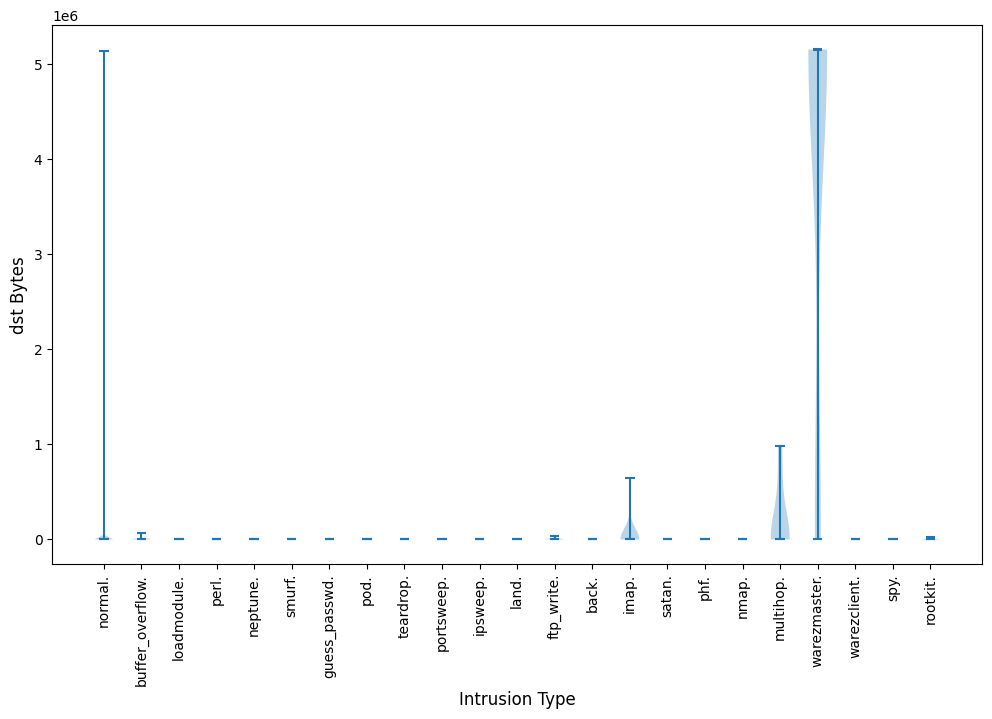

In [18]:
plt.figure(figsize=(12, 7))

# Extract unique categories of 'intrusion_type'
categories = df['intrusion_type'].unique()

# Prepare data for plotting
data = [df[df['intrusion_type'] == category]['dst_bytes'] for category in categories]

# Create the violin plot
plt.violinplot(data, showmeans=False, showmedians=True)

# Set x-axis ticks and labels
plt.xticks(ticks=np.arange(1, len(categories) + 1), labels=categories, rotation=90)

# Set labels for axes
plt.xlabel('Intrusion Type', fontsize=12)
plt.ylabel('dst Bytes', fontsize=12)

# Show plot
plt.show()

### Feature Analysis Insights

- **Using `src_bytes` as a feature**:
  - The intrusion category **"portsweep"** is distinguishable from the rest of the categories.

- **Using `dest_bytes` as a feature**:
  - The intrusion categories **"normal"**, **"imap"**, **"multihop"**, and **"warezmaster"** stand out and are distinguishable from the other categories.

### Challenges with Univariate Analysis

- Due to the relatively **high number of classes**, univariate analysis using **boxplots** and **violin plots** does not provide clear and satisfactory results.

### Suggested Next Steps

- To gain better insights, we can:
  - Use **pairplots** for **Bivariate Analysis**.
  - Alternatively, we can apply **dimensionality reduction techniques** like **PCA** (Principal Component Analysis) or **t-SNE** (t-Distributed Stochastic Neighbor Embedding) to reduce the number of dimensions and conduct **Bi-Variate** or **Tri-Variate Analysis**.

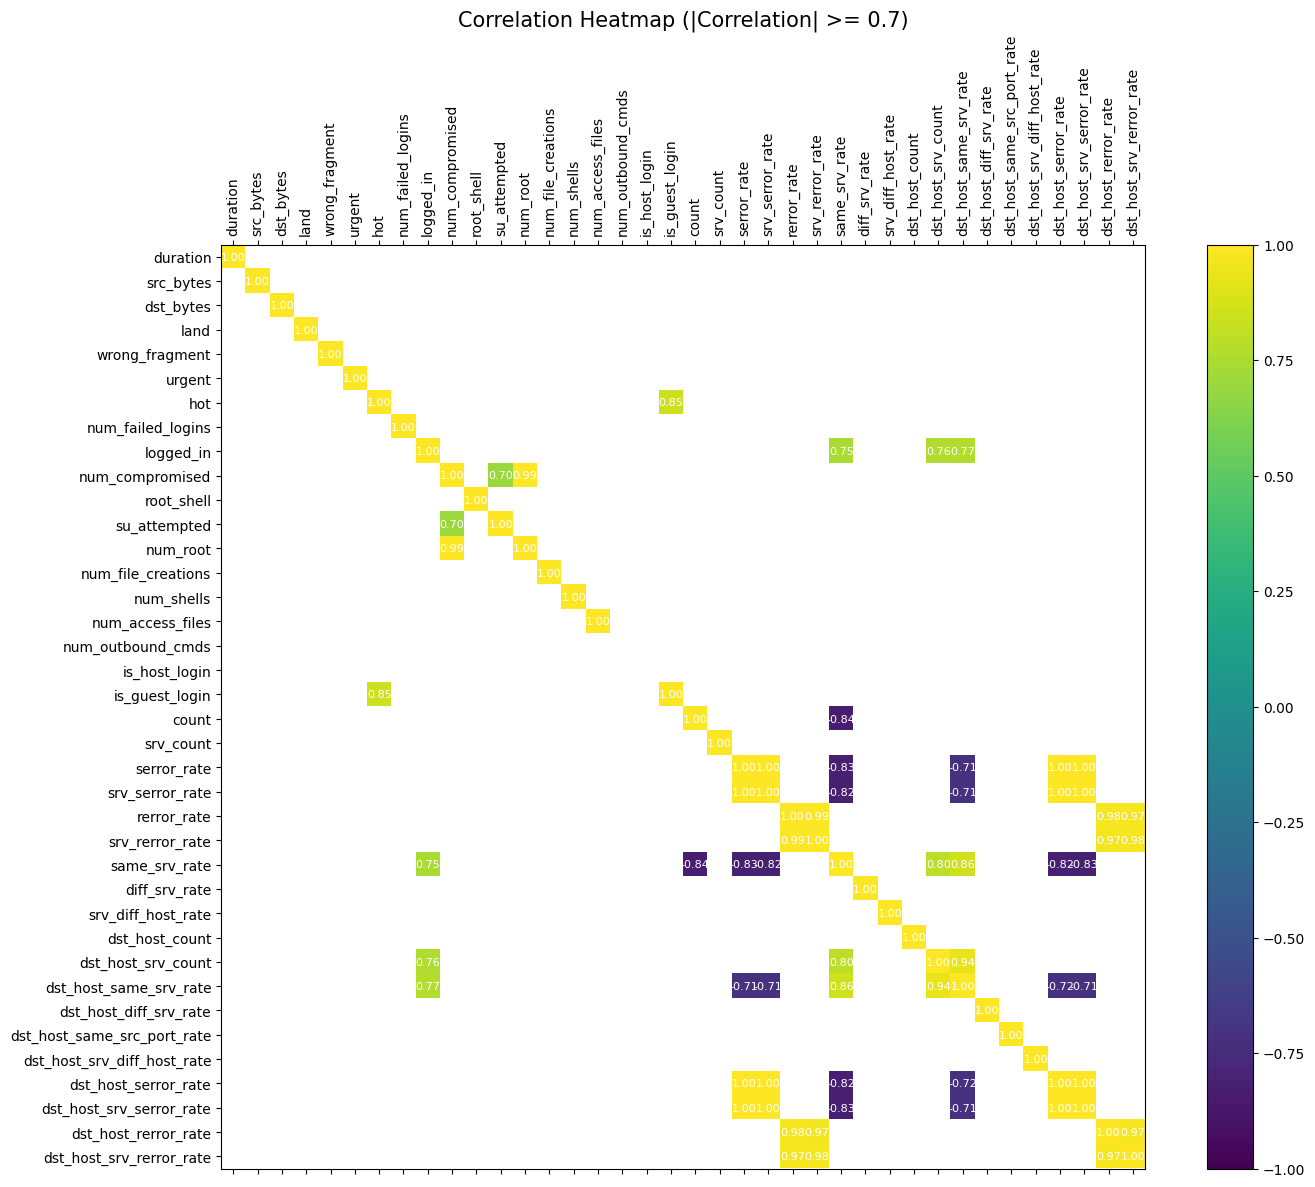

In [19]:
# Create a correlation matrix for numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()

# Filter correlations
corr_filtered = corr[(corr >= 0.7) | (corr <= -0.7)]

# Set up the figure size
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the heatmap using matshow for a fancy look
cax = ax.matshow(corr_filtered, cmap='viridis', vmin=-1, vmax=1)

# Add colorbar for the heatmap
fig.colorbar(cax)

# Add tick marks and labels
ticks = np.arange(0, len(corr_filtered.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# Rotate x-axis labels and set labels for both axes
ax.set_xticklabels(corr_filtered.columns, rotation=90, fontsize=10)
ax.set_yticklabels(corr_filtered.columns, fontsize=10)

# Annotate the heatmap with the correlation values
for (i, j), val in np.ndenumerate(corr_filtered):
    if not np.isnan(val):  # Avoid NaN cells
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=8, color='white')

# Add grid for a clean, fancy look
ax.grid(False)  # Disable gridlines

# Add a title
plt.title('Correlation Heatmap (|Correlation| >= 0.7)', fontsize=15)

# Show plot
plt.show()


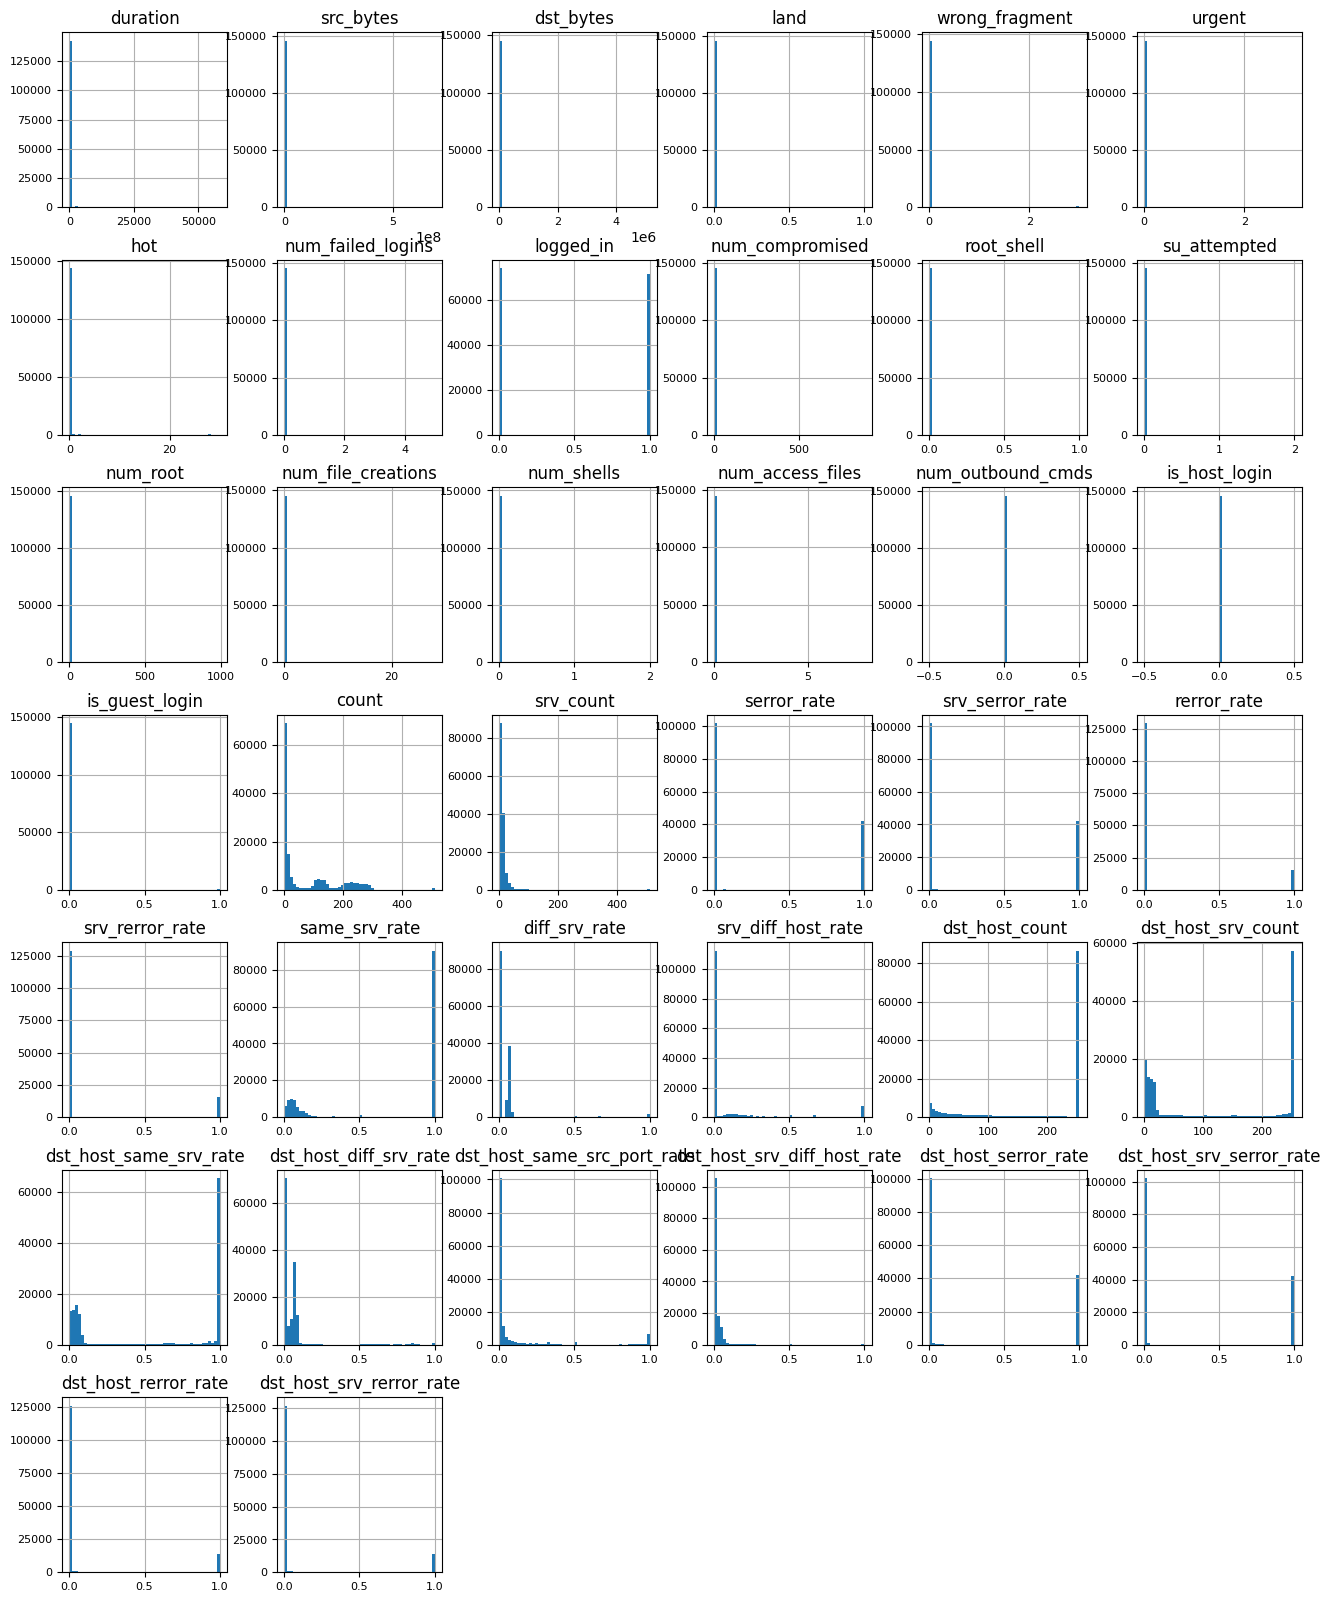

In [20]:
# Distribution of predictors/features
# A `histogram`_ is a representation of the distribution of data
# This function calls `matplotlib.pyplot.hist`, on each series in the DataFrame
# resulting in one histogram per column
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Understanding various discrete predictors in dataset

In [21]:
pd.crosstab(df.protocol_type, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
protocol_type,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,560,0,0,0,0,103,892,0,0,206,1,0,3,641,0,0,0,0
tcp,968,30,8,53,12,91,19,9,7,51820,30,75789,3,4,0,415,7,733,0,2,0,893,20
udp,0,0,0,0,0,0,0,0,0,0,25,11151,0,0,0,0,3,170,0,0,918,0,0


In [22]:

pd.crosstab(df.root_shell, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
root_shell,,,,,,,,,,,,,,,,,,,,,,,
0,968,12,8,53,12,651,19,6,5,51820,158,87809,0,0,206,416,8,906,641,2,918,893,20
1,0,18,0,0,0,0,0,3,2,0,0,23,3,4,0,0,2,0,0,0,0,0,0


In [23]:
pd.crosstab(df.flag, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
flag,,,,,,,,,,,,,,,,,,,,,,,
OTH,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0
REJ,0,0,0,0,0,80,0,0,0,9349,0,4655,0,0,0,74,0,554,0,0,0,0,0
RSTO,0,1,0,45,0,3,0,0,0,446,0,66,0,0,0,7,0,0,0,0,0,1,0
RSTOS0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0
RSTR,90,0,0,4,0,0,0,0,0,0,0,31,0,0,0,299,0,0,0,0,0,1,0
S0,0,0,0,0,1,0,19,0,0,42025,0,51,0,0,0,18,0,164,0,0,0,0,0
S1,2,0,0,0,1,0,0,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0
S2,5,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,1,0,0,0,1,0
S3,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0


### Observations

- **Protocol Usage**:
  - TCP is the **most used protocol**, showing the **highest number of good and bad connections** in the given dataset.

- **Root Shell Access**:
  - There are very few instances where **root shell** has been obtained. This is because root shell access is typically used by **system administrators**.
  - Attackers need to first gain **user-level access** before attempting to escalate their privileges to root.

- **Buffer Overflow and Root Shell Access**:
  - Whenever **root shell access** was observed, a **buffer overflow attack** was also encountered.
  - This is because, when escalating privileges from user to root, generally only two types of attacks are possible:
    1. **Misconfiguration in permissions**.
    2. **Buffer overflows** (more common, as most kernel exploits involve buffer overflows).

- **Neptune Attacks**:
  - In **neptune attacks**, the attacker sends a flood of **SYN packets**, and the target responds with **SYN-ACK packets**.
  - Once the attacker confirms that the target is alive, they send packets with **REJ** and **S0 flags**.
  - Additionally, many packets with **SF flags** are observed in normal, secure connections.

## Model Building

### Project Overview

- In this project, I will address the **Intrusion Detection** problem as a **Binary Classification** problem.
  
- I will classify:
  - Points belonging to the **"Normal"** class as the **Positive Class**.
  - Points belonging to the remaining **22 intrusion classes** as the **Negative Class**.

### Reason for Binary Classification

- The reason for converting this into a **binary classification** problem is that organizations are primarily concerned with **correctly classifying Normal and Bad connections**.
  
- Misclassifying any **Bad connection** as a **Normal connection** poses a significant **security risk** as it could allow malicious entities to gain access to the internal network.
  
- Therefore, our primary focus is to ensure that **Bad connections** do not get misclassified as **Normal** connections, even if it means classifying all bad categories as one class.


In [24]:
target = []
for label in df['intrusion_type'].values:
    if label == 'normal.':
        target.append(0)  # 'Normal' is mapped to 0
    else:
        target.append(1)  # 'Intrusion Detected' is mapped to 1

In [25]:
df['target'] = target  # Add numeric target column
df = df.drop(['intrusion_type'], axis=1)  # Drop the original string column

In [26]:
df.to_csv('cleaned_intrution_data.csv',index=False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145586 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int64  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int64  
 5   dst_bytes                    145586 non-null  int64  
 6   land                         145586 non-null  int64  
 7   wrong_fragment               145586 non-null  int64  
 8   urgent                       145586 non-null  int64  
 9   hot                          145586 non-null  int64  
 10  num_failed_logins            145586 non-null  int64  
 11  logged_in                    145586 non-null  int64  
 12  num_compromised              145586 non-null  int64  
 13  root

## Model Training & Testing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize LabelEncoder for categorical variables
le_protocol = LabelEncoder()
le_service = LabelEncoder()
le_flag = LabelEncoder()

# Step 2: Apply label encoding to the categorical variables
df['protocol_type'] = le_protocol.fit_transform(df['protocol_type'])
df['service'] = le_service.fit_transform(df['service'])
df['flag'] = le_flag.fit_transform(df['flag'])

# Step 3: Now split the dataset
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target (numeric)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
X.shape

(145586, 41)

In [93]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "SVM": SVC(kernel='linear'),
    "Gaussian Naive Bayes": GaussianNB(),
    # "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


In [94]:
# Results storage
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall"])

In [95]:
# Function to plot confusion matrix using matplotlib
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.colorbar()

    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['BAD', 'NORMAL'], rotation=45)
    plt.yticks(tick_marks, ['BAD', 'NORMAL'])

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()
    plt.show()

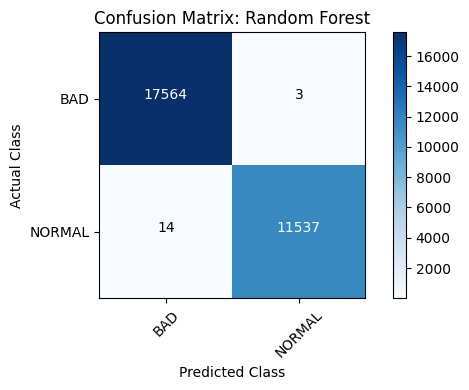

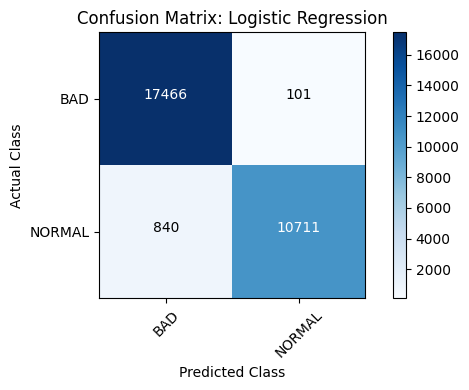

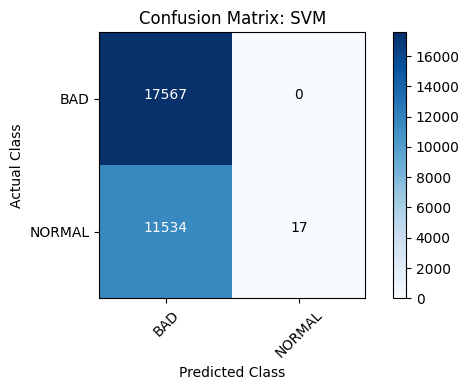

Comparison of all models:
                 Model  Accuracy  Precision    Recall
0        Random Forest  0.999416   0.999740  0.998788
1  Logistic Regression  0.967683   0.990659  0.927279
2                  SVM  0.603888   1.000000  0.001472
Best model (Random Forest) saved with accuracy: 0.9994161686929047


In [96]:
import joblib

# Initialize variables to store the best model and highest accuracy
best_model = None
best_model_name = ""
best_accuracy = 0

# Assuming you have your models stored in the 'models' dictionary
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall"])  # Initialize results dataframe

# Step 4: Train models, generate predictions, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)

    # Since y_test and y_pred are now numeric, no need to convert
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Add the metrics to the results table
    new_row = pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [acc],
        "Precision": [precision],
        "Recall": [recall]
    })

    # Concatenate the new row to the results DataFrame
    results = pd.concat([results, new_row], ignore_index=True)
    
    # Plot confusion matrix (assuming you have the plot_confusion_matrix function defined)
    plot_confusion_matrix(cm, model_name)
    
    # Track the best model based on accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name

# Display the comparison table
print("Comparison of all models:")
print(results)

# Step 5: Save the best model to a file
if best_model is not None:
    joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
    print(f"Best model ({best_model_name}) saved with accuracy: {best_accuracy}")

In [11]:
from azureml.core import Workspace, Model

# Connect to the Azure ML Workspace
ws = Workspace.from_config()

# Register the model in Azure ML
registered_model = Model.register(workspace=ws,
                       model_name="best_intrusion_detection_model",  # Name of the registered model
                       model_path="Random_Forest_best_model.pkl")    # Path to your saved model


Registering model best_intrusion_detection_model


In [12]:
# Create a Conda environment for your scikit-learn model

from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies

conda_env = Environment('my-conda-env')
conda_env.python.conda_dependencies = CondaDependencies.create(conda_packages=['scikit-learn'])

## Deploying the Model as a Web Service

In [13]:
# Create an InferenceConfig
from azureml.core.model import InferenceConfig
inference_config = InferenceConfig(entry_script='score.py', environment=conda_env)

In [14]:
# Specify deployment configuration for ACI
from azureml.core.webservice import AciWebservice, Webservice
aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

In [15]:
service = Model.deploy(workspace=ws,
                       name='intrution-prediction-service',
                       models=[registered_model],
                       inference_config=inference_config,
                       deployment_config=aci_config)
service.wait_for_deployment(show_output=True)

/tmp/ipykernel_3287/656689626.py:1: FutureWarning: azureml.core.model:
To leverage new model deployment capabilities, AzureML recommends using CLI/SDK v2 to deploy models as online endpoint, 
please refer to respective documentations 
https://docs.microsoft.com/azure/machine-learning/how-to-deploy-managed-online-endpoints /
https://docs.microsoft.com/azure/machine-learning/how-to-attach-kubernetes-anywhere 
For more information on migration, see https://aka.ms/acimoemigration 
To disable CLI/SDK v1 deprecation warning set AZUREML_LOG_DEPRECATION_WARNING_ENABLED to 'False'
  service = Model.deploy(workspace=ws,


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2024-10-26 13:14:30+00:00 Creating Container Registry if not exists.
2024-10-26 13:14:31+00:00 Use the existing image.
2024-10-26 13:14:32+00:00 Generating deployment configuration.
2024-10-26 13:14:34+00:00 Submitting deployment to compute.
2024-10-26 13:14:38+00:00 Checking the status of deployment intrution-prediction-service..
2024-10-26 13:15:53+00:00 Checking the status of inference endpoint intrution-prediction-service.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [16]:
scoring_uri = service.scoring_uri

In [17]:
scoring_uri

'http://10df56b4-0ab4-44aa-bddd-a0361f9cc9d0.eastus2.azurecontainer.io/score'

## Testing the Web Service

In [18]:
import requests
import json

# Define the input data as a list
# input_data = [5,166,72,19,175,25.8,0.587,51]


input_data = [
    45,         # duration
    1,      # protocol_type
    0,     # service
    1,       # flag
    300,        # src_bytes
    150,        # dst_bytes
    0,          # land
    0,          # wrong_fragment
    0,          # urgent
    0,          # hot
    0,          # num_failed_logins
    1,          # logged_in
    0,          # num_compromised
    0,          # root_shell
    0,          # su_attempted
    0,          # num_root
    0,          # num_file_creations
    0,          # num_shells
    0,          # num_access_files
    0,          # num_outbound_cmds
    0,          # is_host_login
    0,          # is_guest_login
    5,          # count
    3,          # srv_count
    0.0,        # serror_rate
    0.0,        # srv_serror_rate
    0.0,        # rerror_rate
    0.0,        # srv_rerror_rate
    1.0,        # same_srv_rate
    0.0,        # diff_srv_rate
    0.0,        # srv_diff_host_rate
    100,        # dst_host_count
    100,        # dst_host_srv_count
    0.0,        # dst_host_same_srv_rate
    0.0,        # dst_host_diff_srv_rate
    0.0,        # dst_host_same_src_port_rate
    0.0,        # dst_host_srv_diff_host_rate
    0.0,        # dst_host_serror_rate
    0.0,        # dst_host_srv_serror_rate
    0.0,        # dst_host_rerror_rate
    0.0         # dst_host_srv_rerror_rate
]

# {"data": [{"protocol_type": "tcp", "service": "http", "flag": "SF", "land": 0, "urgent": 0, "hot": 0, "num_failed_logins": 0, "logged_in": 0, "num_compromised": 0, "root_shell": 0, "su_attempted": 0, "num_root": 0, "num_file_creations": 0, "num_shells": 0, "num_access_files": 0, "num_outbound_cmds": 0, "is_host_login": 0, "is_guest_login": 0, "count": 0, "srv_count": 0, "serror_rate": 0, "srv_serror_rate": 0, "rerror_rate": 0, "srv_rerror_rate": 0, "same_srv_rate": 0, "diff_srv_rate": 0, "srv_diff_host_rate": 0, "dst_host_count": 0, "dst_host_srv_count": 0, "dst_host_same_srv_rate": 0, "dst_host_diff_srv_rate": 0, "dst_host_same_src_port_rate": 0, "dst_host_srv_diff_host_rate": 0, "dst_host_serror_rate": 0, "dst_host_srv_serror_rate": 0, "dst_host_rerror_rate": 0, "dst_host_srv_rerror_rate": 0, "duration": 50, "src_bytes": 0, "dst_bytes": 0, "wrong_fragment": 0}]}


# Convert the input data to a JSON string
input_data_json = json.dumps({"data": [input_data]})

# Replace with the URL of your deployed service
scoring_uri = "http://10df56b4-0ab4-44aa-bddd-a0361f9cc9d0.eastus2.azurecontainer.io/score"  

# Define the content type
headers = {"Content-Type": "application/json"}

# Send an HTTP POST request to the endpoint
response = requests.post(scoring_uri, data=input_data_json, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Parse the JSON response
    result = json.loads(response.json())
    print(result)
    # Extract the prediction (result) from the response
    prediction = result["result"][0]
    print(f"Prediction: {prediction}")
else:
    print(f"Error: {response.text}")

{'result': [0]}
Prediction: 0
